In [1]:
# Import the BQL library
import bql

# Instantiate an object to interface with the BQL service
bq = bql.Service()

# BQL String Interface Basics

You can use Bloomberg Query Language (BQL) via the PyBQL API to request Bloomberg data from within BQuant notebooks. There are two main ways to use BQL: the object model and the string interface. This notebook provides an introduction to the string interface. We'll start with a simple example and build on it to learn how to construct more complex requests.

<a href = "#A">Example A: Requesting a Single Data Item</a>  
<a href = "#B">Example B: Requesting Multiple Data Items</a>  
<a href = "#C">Example C: Requesting Time Series and Point-In-Time Data</a>  
<a href = "#D">Example D: Requesting Data for Multiple Securities</a>  
<a href = "#E">Options Examples</a>  
<a href = "#F">ETF Examples</a>  
<a href = "#G">Additional (Portfolio interop, technicals)</a>  
<a href = "#J">Cross Asset</a>  
<br>

## Example A: Requesting a Single Data Item <a name="A"></a>
In this example, we'll create and execute the simplest possible request: a single data item for a single security. We'll build on this request in later examples. For now, let's request the last price for AAPL US Equity. To do this, we'll define a variable for the request and pass it to the BQL execute function.

- **Request syntax**:  
        `get(data fields)for([security or universe])`
- **BQL execute function**:  
        `bq.execute(request)`

_Note: For more information on finding data fields that can be queried with BQL, see <a href = "#related"> Related Resources</a> ._


### Basic Last Price Request

In [2]:
# Define the request string 
request = "get(PX_LAST)for(['AAPL US Equity'])"

# Execute the request
response = bq.execute(request)

# Display the response in a DataFrame
response[0].df()

,DATE,CURRENCY,PX_LAST
ID,,,
AAPL US Equity,2020-05-15,USD,303.01001


<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>

## Example B: Requesting Multiple Data Items <a name="B"></a>
Now that we've seen how to request a single data item, let's expand the previous example to request additional data items. We'll again use AAPL US Equity, but this time we'll request the last price, high price, and low price.

### Example Code

In [4]:
# Define the request string
request = """
get(PX_LAST, PX_HIGH, PX_LOW)
for(['AAPL US Equity'])
"""

# Execute the request
response = bq.execute(request)

# Display the response in a DataFrame
# Use the combined_df function to display the three returned values in a single DataFrame 
bql.combined_df(response)

# Note that you can also display a single data item from the response 
# by running response[0].df(), response[1].df(), or response[2].df(),


,DATE,CURRENCY,PX_LAST,PX_HIGH,PX_LOW
ID,,,,,
AAPL US Equity,2020-05-15,USD,303.200012,306.119995,300.209991


In [4]:
#Define utility BQL function to 
def query_bql(s):
    resp = bq.execute(s)
    df = bql.combined_df(resp)
    return df

In [5]:
request = """
get(PX_LAST, PX_HIGH, PX_LOW)
for(['F US Equity'])
"""

In [6]:
df_response = query_bql(request)
df_response

,DATE,CURRENCY,PX_LAST,PX_HIGH,PX_LOW
ID,,,,,
F US Equity,2020-05-07,USD,4.93,4.98,4.88


<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>

## Example C: Requesting Time Series and Point-In-Time Data <a name="C"></a>
In the examples above, we didn't specify a data date so BQL returned data for today's date by default. If we want to return data for a specific date or date range, we can pass start and end values as arguments to the BQL range function. Note that the dates are associated with the data fields, not the request.

_Note: To request point-in-time data (for a single date), pass the same value for the start and end parameters._


### Example Code

In [5]:
# Define the request string, specifying the date range for each field
# Since we're using the same range for all of the fields, we can use
# a BQL let clause to define a local variable 
request = """
let(
    #date_range = RANGE(2018-06-05, 2019-02-28);
    )
get(
    PX_LAST(dates=#date_range) as #PX_LAST,
    PX_HIGH(dates=#date_range), 
    PX_LOW(dates=#date_range)
    )
for(
    ['TSLA US Equity', 'AMZN US Equity']
    )
"""

# Execute the request
response = bq.execute(request)

# Display the response in a DataFrame
# Use the combined_df function to display 
# the three returned values in a single DataFrame 
df =bql.combined_df(response)
df

,DATE,CURRENCY,#PX_LAST,PX_HIGH(dates=#date_range),PX_LOW(dates=#date_range)
ID,,,,,
TSLA US Equity,2018-06-05,USD,291.13,297.8000,286.740
TSLA US Equity,2018-06-06,USD,319.50,322.1700,297.480
TSLA US Equity,2018-06-07,USD,316.09,330.0000,313.580
TSLA US Equity,2018-06-08,USD,317.66,324.4800,317.150
TSLA US Equity,2018-06-09,USD,NaN,NaN,NaN
TSLA US Equity,2018-06-10,USD,NaN,NaN,NaN
TSLA US Equity,2018-06-11,USD,332.10,334.6600,322.500
TSLA US Equity,2018-06-12,USD,342.77,354.9700,338.000
TSLA US Equity,2018-06-13,USD,344.78,347.2000,339.800


In [6]:
df.shape

(538, 5)

In [7]:
df2 = df.reset_index()
df2.head()

,ID,DATE,CURRENCY,#PX_LAST,PX_HIGH(dates=#date_range),PX_LOW(dates=#date_range)
0,TSLA US Equity,2018-06-05,USD,291.13,297.80,286.74
1,TSLA US Equity,2018-06-06,USD,319.50,322.17,297.48
2,TSLA US Equity,2018-06-07,USD,316.09,330.00,313.58
3,TSLA US Equity,2018-06-08,USD,317.66,324.48,317.15
4,TSLA US Equity,2018-06-09,USD,NaN,NaN,NaN


In [8]:
df3 = df2.pivot(index='DATE', columns='ID',values = '#PX_LAST')
df3.tail(n=10)

ID,AMZN US Equity,TSLA US Equity
DATE,,
2019-02-19,1627.58,305.64
2019-02-20,1622.10,302.56
2019-02-21,1619.44,291.23
2019-02-22,1631.56,294.71
2019-02-23,NaN,NaN
2019-02-24,NaN,NaN
2019-02-25,1633.00,298.77
2019-02-26,1636.40,297.86
2019-02-27,1641.09,314.74


In [12]:
chartdf = df3.dropna()
chartdf.tail(n=10)

ID,AMZN US Equity,TSLA US Equity
DATE,,
2019-02-14,1622.65,303.77
2019-02-15,1607.95,307.88
2019-02-19,1627.58,305.64
2019-02-20,1622.10,302.56
2019-02-21,1619.44,291.23
2019-02-22,1631.56,294.71
2019-02-25,1633.00,298.77
2019-02-26,1636.40,297.86
2019-02-27,1641.09,314.74


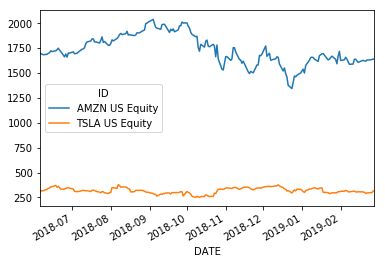

In [21]:
chartdf.plot()

In [97]:
import bqviz as bqv

bqv.LinePlot(chartdf).set_style().show()

GridBox(children=(Figure(animation_duration=500, axes=[Axis(color='white', grid_color='#3c3c3c', grid_lines='d…

<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>

## Example D: Requesting Data for Multiple Securities <a name="D"></a>
Now that we know how to pull multiple data items across a range of dates for a single security, let's look at how we can request data for multiple securities by passing a list as part of the request string.

### Example Code

In [22]:
# Define the request string, specifying the date range for each field
# Since we're using the same range for all of the fields, we can use
# a BQL let clause to define a local variable 
request = """
let(
#NAME=VALUE(NAME,translatesymbols(members('LUACTRUU index'),instrumentidtype='Corp',targetIDtype='fundamentalticker'),mapby=lineage).value;

#TICKER=VALUE(FUNDAMENTAL_TICKER,translatesymbols(members('LUACTRUU index'),instrumentidtype='Corp',targetIDtype='fundamentalticker'),mapby=lineage).value;

#ID=CONCAT(CONCAT(#NAME,':  '), #TICKER);
#wgt=ID().Weights;) 

get(groupsort(SUM(GROUP(#wgt,#ID))) as #PCT) 

for(Members('LUACTRUU Index')) 

with(fill=prev)
																																		
																
"""

# Execute the request
response = bq.execute(request)

# Display the response in a DataFrame
# Use the combined_df function to display 
# the three returned values in a single DataFrame
# To verify the output, use tail(3) to show the last three rows of the response
bql.combined_df(response).sample(n=15)

,ORIG_IDS,#ID,#PCT
ID,,,
Unum Group: UNM US Equity,None,Unum Group: UNM US Equity,0.026364
KLA Corp: KLAC US Equity,None,KLA Corp: KLAC US Equity,0.057574
CNH Industrial NV: CNHI US Equity,None,CNH Industrial NV: CNHI US Equity,0.018525
Sands China Ltd: 1928 HK Equity,None,Sands China Ltd: 1928 HK Equity,0.093946
Highwoods Realty LP: 10180Z US Equity,None,Highwoods Realty LP: 10180Z US Equity,0.028311
Union Pacific Corp: UNP US Equity,None,Union Pacific Corp: UNP US Equity,0.455966
Mondelez International Inc: MDLZ US Equity,None,Mondelez International Inc: MDLZ US Equity,0.073488
MidAmerican Energy Co: 2454Q US Equity,None,MidAmerican Energy Co: 2454Q US Equity,0.133314
NIKE Inc: NKE US Equity,None,NIKE Inc: NKE US Equity,0.170246


<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>

## Single Stock Option Open Interest Analysis <a name="E"></a>
#### Expiries with highest Open Interest

In [23]:
# Define the request string, specifying the date range for each field
# Since we're using the same range for all of the fields, we can use
# a BQL let clause to define a local variable 
request2 = """
get(
      sum(group(znav(
            OPEN_INT().value), 
            EXPIRE_DT)
        ) as #OPEN_INTEREST
    )
for(
    options(['TSLA US EQUITY'])
    )														
"""

# Execute the request
response2 = bq.execute(request2)

# Display the response in a DataFrame
# Use the combined_df function to display 
# the three returned values in a single DataFrame
# To verify the output, use tail(3) to show the last three rows of the response
#bql.combined_df(response2).tail(3)
newdf = bql.combined_df(response2)
newdf = newdf.drop(['ORIG_IDS'], axis=1)
newdf

,EXPIRE_DT,#OPEN_INTEREST
ID,,
2020-05-15T00-00-00Z,2020-05-15,383349.0
2020-05-22T00-00-00Z,2020-05-22,71517.0
2020-05-29T00-00-00Z,2020-05-29,33884.0
2020-06-05T00-00-00Z,2020-06-05,12035.0
2020-06-12T00-00-00Z,2020-06-12,4245.0
2020-06-19T00-00-00Z,2020-06-19,401451.0
2020-06-26T00-00-00Z,2020-06-26,856.0
2020-07-17T00-00-00Z,2020-07-17,91505.0
2020-08-21T00-00-00Z,2020-08-21,65118.0


## Volatility Smile
#### Implied Volatility Curve filtered by Open Interest

In [24]:
# Define the request string, specifying the date range for each field
request = """
get(groupsort(STRIKE_PX, order=ASC), OPEN_INT, IVOL) 
for(
    filter(
           options(['MSFT US Equity']), 
           PUT_CALL==IF(PCT_MONEYNESS<100,PUT,CALL)   AND 
           OPEN_INT > 10 AND 
           YEAR(EXPIRE_DT) ==2020 AND 
           MONTH(EXPIRE_DT)== 3 AND IVOL>0
         ) 
    )
														
"""

# Execute the request
response3 = bq.execute(request)

BQL ERROR: No symbols met filter criteria in FILTER(options(['MSFT US Equity']),PUT_CALL==IF(PCT_MONEYNESS<100,PUT,CALL) AND YEAR(EXPIRE_DT)==2020 AND MONTH(EXPIRE_DT)==3 AND IVOL>0)., request_id=97879f49bc394c1887f9bfe88360a6d4 payload_id=None


ResponseError: No symbols met filter criteria in FILTER(options(['MSFT US Equity']),PUT_CALL==IF(PCT_MONEYNESS<100,PUT,CALL) AND YEAR(EXPIRE_DT)==2020 AND MONTH(EXPIRE_DT)==3 AND IVOL>0).

In [ ]:
# Display the response in a DataFrame
# Use the combined_df function to display 
newdf = bql.combined_df(response3)
newdf.sample(n=20)

## Vega Weighting
#### Average Vega weighted by Open Interest for monthly options on a list

In [ ]:
# Define the request string, specifying the date range for each field
request = """
get(
    wavg(
               group(znav(VEGA),UNDL_TICKER),  
               group(OPEN_INT,UNDL_TICKER) 
    ) as #AVGVEGA_OI
)  
for(
    filter(
        options(
            ['TSLA US EQUITY','CRM US EQUITY','IBM US EQUITY',
            'GOOG US EQUITY', 'MSFT US EQUITY', 'ESL US EQUITY']
            ), 
        EXPIRATION_PERIODICITY==Monthly
        )
    )											
"""

# Execute the request
response4 = bq.execute(request)

# Display the response in a DataFrame
newdf = bql.combined_df(response4)


In [ ]:
newdf = newdf.drop(["DATE","EXERCISE_TYPE", 'EXPIRE_DT', 'PUT_CALL', "ORIG_IDS", 'STRIKE_PX'], axis=1)
newdf

<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>

## ETF Fund Flows<a name="F"></a>
#### Fixed Income Fund Flows bucketed by Fund Objective

In [25]:
# Define the request string, specifying the date range for each field
request = """
let(
    #FLOW_30D = SUM(
        FUND_FLOW(Dates=range(-1m,0d),
        CURRENCY=USD,FILL=PREV)
        );
) 
get(
    sum(group(#FLOW_30D, FUND_OBJECTIVE_LONG))  as #30D_FLOW
) 
for(
    Filter(Fundsuniv(['ALL','Primary']),FUND_TYP=='ETF' AND 
                FUND_GEO_FOCUS=='U.S.' AND 
                FUND_ASSET_CLASS_FOCUS=='Fixed Income' AND 
                SUM(FUND_FLOW(Dates=range(-1m,0d),CURRENCY=USD,FILL=PREV)) > 0)
)																				
"""

# Execute the request
response5 = bq.execute(request)

In [26]:
# Display the response in a DataFrame
newdf = bql.combined_df(response5)
newdf = newdf.drop(["ORIG_IDS"], axis=1)
newdf

,DATE,CURRENCY,FUND_OBJECTIVE_LONG,#30D_FLOW
ID,,,,
Aggregate Bond,2020-05-15,USD,Aggregate Bond,8.774168e+09
Corporate,2020-05-15,USD,Corporate,1.869025e+10
Government,2020-05-15,USD,Government,1.112391e+10
Inflation Protected,2020-05-15,USD,Inflation Protected,1.606794e+09
Mortgage-Backed,2020-05-15,USD,Mortgage-Backed,6.210221e+08
Muni National Intermediate,2020-05-15,USD,Muni National Intermediate,3.673470e+06
Muni National Long,2020-05-15,USD,Muni National Long,4.503543e+07
Municipals,2020-05-15,USD,Municipals,1.876030e+09
NullGroup,2020-05-15,USD,None,2.799171e+08


## ETF Performance
#### Big moves recently

In [98]:
# Define the request string, specifying the date range for each field
request = """
let(
    #PctChg3day=pct_chg(dropna(px_last(start=-3d)));
    #parent = parent_comp_name;
    #name = long_comp_name;
) 
get(#name, #parent, #PctChg3day) 
for(
    filter(
           fundsuniv(['PRIMARY','ACTIVE']),
           fund_asset_class_focus == 'Equity' AND 
            #PctChg3day > 10
     )
) 
with(mode='cached')														
"""

# Execute the request
response6 = bq.execute(request)

# Display the response in a DataFrame
newdf2 = bql.combined_df(response6)
#newdf = newdf.drop(["CURRENCY"], axis=1)
#-----

#response6[0].df().sample(5)
response6[2].df().sample(5)


#import pandas as pd 

#newdf2 = pd.concat([x.df() for x in response], axis=1)
#newdf2.sample(10)

#newdf4 = pd.DataFrame({r.name:r.df()[r.name] for r in response})
#newdf4



import pandas as pd

temp0 = response6[0].df()
temp1 = response6[1].df()

temp2_ = response6[2].df()
temp2 = temp2_.filter(like='day')


#temp0_.head()
newdf = pd.concat([temp0, temp1, temp2], axis=1, join = 'inner')
newdf.sample(10)

In [124]:
newdf4 = pd.DataFrame({r.name:r.df()[r.name] for r in response6})
newdf4

,#PctChg3day,#name,#parent
ID,,,
BEARH153 FH Equity,12.499995,BEAR OMXH15 X3 H,Handelsbanken Capital Markets
HGU CN Equity,14.648364,BetaPro Canadian Gold Miners 2x Daily Bull ETF,Horizons ETFs Management Canad
XABEAR2 SS Equity,10.419026,XACT Bear 2,Xact Kapitalforvaltning AB
DRV US Equity,11.840566,Direxion Daily Real Estate Bear 3x Shares,Direxion ETFs/USA
BAF LN Equity,15.094340,British & American Investment Trust PLC/Fund,British & American Investment
DODXF US Equity,15.340909,ELEMENTS Dogs of the Dow Linked to the DJ High...,ELEMENTS ETNs/Deutsche Bank AG
NUGT US Equity,15.401464,Direxion Daily Gold Miners Index Bull 2X Shares,Direxion ETFs/USA
FNR CN Equity,16.666667,49 North Resources Inc,Union Securities Ltd/Canada
SILJ US Equity,12.327308,ETFMG Prime Junior Silver Miners ETF,ETF Managers Trust


In [126]:
newdf2 = pd.concat([x.df() for x in response], axis=1, join = 'inner')
newdf2.sample(10)

,ORIG_IDS,#ID,#PCT
ID,,,
AmerisourceBergen Corp: ABC US Equity,None,AmerisourceBergen Corp: ABC US Equity,0.057162
AXIS Specialty Finance PLC: 0960932DLN Equity,AQ251879 Corp,AXIS Specialty Finance PLC: 0960932DLN Equity,0.006097
Zimmer Biomet Holdings Inc: ZBH US Equity,None,Zimmer Biomet Holdings Inc: ZBH US Equity,0.096446
Teck Resources Ltd: TECK/B CN Equity,None,Teck Resources Ltd: TECK/B CN Equity,0.039399
Adobe Inc: ADBE US Equity,None,Adobe Inc: ADBE US Equity,0.072335
Host Hotels & Resorts LP: 3662106ZUS Equity,None,Host Hotels & Resorts LP: 3662106ZUS Equity,0.044344
Primerica Inc: PRI US Equity,EJ280550 Corp,Primerica Inc: PRI US Equity,0.006528
Xylem Inc/NY: XYL US Equity,None,Xylem Inc/NY: XYL US Equity,0.026126
Crane Co: CR US Equity,None,Crane Co: CR US Equity,0.010510


In [128]:
from bqwidgets import DataGrid

newdf1 =newdf4.reset_index()
dg = DataGrid(data=newdf4)
dg

DataGrid(column_defs=[{'filter': 'number', 'width': 100, 'headerName': '#PctChg3day', 'field': '#PctChg3day'},…

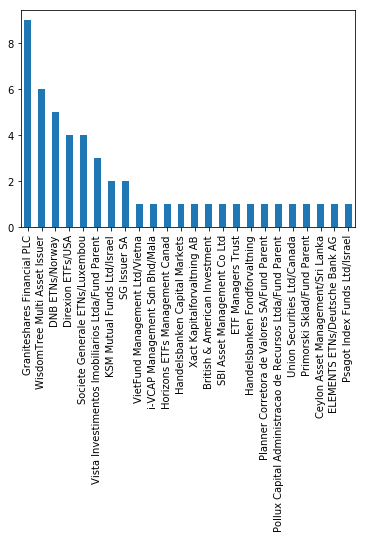

In [129]:
newdf4['#parent'].value_counts().plot.bar()

In [81]:
temp1.head()

,#PctChg3day
ID,
BEARH153 FH Equity,12.499995
HGU CN Equity,13.104635
XABEAR2 SS Equity,10.419026
DRV US Equity,12.055487
BAF LN Equity,15.094340


<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>

## Exponential Moving Avg of Skew<a name="G"></a>
#### 5 day period, 30d 90/110

In [22]:
request = """
let(
    #Skew=implied_volatility(EXPIRY=30D,PCT_MONEYNESS=90,fill=prev)-implied_volatility(EXPIRY=30D,PCT_MONEYNESS=110,fill=prev);
    #EMAVG_Skew=emavg(close=#skew,period=5);
    #SPX_EMAVG_Skew=wavg(group(#EMAVG_Skew),group(id().weights));
    #Hist_SPX_EMAVG_Skew=rolling(#SPX_EMAVG_Skew,iterationdates=range(-2y,0d,frq=m));
) 
get(
    #Hist_SPX_emavg_skew
) 
for(
    members('spx index')
)												
"""

# Execute the request
response7 = bq.execute(request)

In [23]:
# Display the response in a DataFrame
newdf = bql.combined_df(response7)
newdf

,DATE,ORIG_IDS:0,ORIG_IDS:1,ITERATION_DATE,ITERATION_ID,#Hist_SPX_emavg_skew
ID,,,,,,
IdentityGroup,2018-02-27,None,IdentityGroup,2018-02-27,IdentityGroup:ITR0,6.545493
IdentityGroup,2018-03-27,None,IdentityGroup,2018-03-27,IdentityGroup:ITR1,7.576934
IdentityGroup,2018-04-27,None,IdentityGroup,2018-04-27,IdentityGroup:ITR2,6.667373
IdentityGroup,2018-05-27,None,IdentityGroup,2018-05-27,IdentityGroup:ITR3,5.791063
IdentityGroup,2018-06-27,None,IdentityGroup,2018-06-27,IdentityGroup:ITR4,6.165063
IdentityGroup,2018-07-27,None,IdentityGroup,2018-07-27,IdentityGroup:ITR5,5.495049
IdentityGroup,2018-08-27,None,IdentityGroup,2018-08-27,IdentityGroup:ITR6,5.766922
IdentityGroup,2018-09-27,None,IdentityGroup,2018-09-27,IdentityGroup:ITR7,5.620474
IdentityGroup,2018-10-27,None,IdentityGroup,2018-10-27,IdentityGroup:ITR8,7.595842


In [24]:
newdf = newdf.drop(['ORIG_IDS:0', 'ORIG_IDS:1', 'ITERATION_DATE'], axis=1)
newdf

,DATE,ITERATION_ID,#Hist_SPX_emavg_skew
ID,,,
IdentityGroup,2018-02-27,IdentityGroup:ITR0,6.545493
IdentityGroup,2018-03-27,IdentityGroup:ITR1,7.576934
IdentityGroup,2018-04-27,IdentityGroup:ITR2,6.667373
IdentityGroup,2018-05-27,IdentityGroup:ITR3,5.791063
IdentityGroup,2018-06-27,IdentityGroup:ITR4,6.165063
IdentityGroup,2018-07-27,IdentityGroup:ITR5,5.495049
IdentityGroup,2018-08-27,IdentityGroup:ITR6,5.766922
IdentityGroup,2018-09-27,IdentityGroup:ITR7,5.620474
IdentityGroup,2018-10-27,IdentityGroup:ITR8,7.595842


## Reading Public Portfolios<a name="H"></a>
#### e.g. using the FLNG number

In [95]:
request = """
get(
      ID
) 
for(
    members(Type=Holdings, symbols='SPY US Equity')
) 							
"""

# Execute the request
response8 = bq.execute(request)


request = """
get(
      ID
) 
for(
    members(['H319705-10 Client'],Type=PORT)
) 							
"""

# Execute the request
response8 = bq.execute(request)


In [96]:
# Display the response in a DataFrame
newdf2 =response8[0].df()
#newdf2 = bql.combined_df(response8)
newdf2

,POSITION,WEIGHTS,AS_OF_DATE,REPORTED_MKT_VAL,CURRENCY,LATEST_CHANGE,ORIG_IDS,ID
ID,,,,,,,,
MSFT US Equity,82117353.0,5.812282,2020-05-14,1.482465e+10,USD,-486628.0,SPY US Equity,MSFT US Equity
AAPL US Equity,44958208.0,5.456173,2020-05-14,1.391636e+10,USD,-270632.0,SPY US Equity,AAPL US Equity
AMZN US Equity,4482935.0,4.198689,2020-05-14,1.070906e+10,USD,-27000.0,SPY US Equity,AMZN US Equity
FB US Equity,25909176.0,2.100814,2020-05-14,5.358277e+09,USD,-150280.0,SPY US Equity,FB US Equity
GOOGL US Equity,3225975.0,1.716163,2020-05-14,4.377196e+09,USD,-18720.0,SPY US Equity,GOOGL US Equity
GOOG US Equity,3217952.0,1.710973,2020-05-14,4.363961e+09,USD,-18720.0,SPY US Equity,GOOG US Equity
JNJ US Equity,28335998.0,1.640231,2020-05-14,4.183527e+09,USD,-164424.0,SPY US Equity,JNJ US Equity
BRK/B US Equity,21059635.0,1.411340,2020-05-14,3.599723e+09,USD,-122200.0,SPY US Equity,BRK/B US Equity
V US Equity,18428658.0,1.307057,2020-05-14,3.333744e+09,USD,-106912.0,SPY US Equity,V US Equity


<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>

## Cross Asset Query <a name="J"></a>
##### What are the companies that I am the most exposed to within the US Corporate Bond Index (LUACTRUU)?

In [27]:
request = """
let(
#NAME=VALUE(NAME,translatesymbols(members('LUACTRUU index'),instrumentidtype='Corp',targetIDtype='fundamentalticker'),mapby=lineage).value;

#TICKER=VALUE(FUNDAMENTAL_TICKER,translatesymbols(members('LUACTRUU index'),instrumentidtype='Corp',targetIDtype='fundamentalticker'),mapby=lineage).value;

#ID=CONCAT(CONCAT(#NAME,':  '), #TICKER);
#wgt=ID().Weights;) 

get(groupsort(SUM(GROUP(#wgt,#ID))) as #PCT) 

for(Members('LUACTRUU Index')) 

with(fill=prev)				
"""

# Execute the request
response9 = bq.execute(request)


In [28]:
# Display the response in a DataFrame
newdf3 =response9[0].df()
#newdf2 = bql.combined_df(response8)
newdf3

,ORIG_IDS,#ID,#PCT
ID,,,
Bank of America Corp: BAC US Equity,None,Bank of America Corp: BAC US Equity,2.099665
JPMorgan Chase & Co: JPM US Equity,None,JPMorgan Chase & Co: JPM US Equity,2.099571
AT&T Inc: T US Equity,None,AT&T Inc: T US Equity,1.753742
Citigroup Inc: C US Equity,None,Citigroup Inc: C US Equity,1.686219
Wells Fargo & Co: WFC US Equity,None,Wells Fargo & Co: WFC US Equity,1.629509
Goldman Sachs Group Inc/The: GS US Equity,None,Goldman Sachs Group Inc/The: GS US Equity,1.540419
Comcast Corp: CMCSA US Equity,None,Comcast Corp: CMCSA US Equity,1.494459
Morgan Stanley: MS US Equity,None,Morgan Stanley: MS US Equity,1.362673
Apple Inc: AAPL US Equity,None,Apple Inc: AAPL US Equity,1.315639


## Cross Asset Query <a name="H"></a>
##### Break out the average Equity Implied Volatility by Credit Rating for the US Corporate Index?

In [29]:
request = """
let(#buckets=if(in(BB_COMPOSITE,['BB','BB+','BB-']),'BB',
if(in(BB_COMPOSITE,['BBB','BBB+','BBB-']),'BBB',
if(in(BB_COMPOSITE,['B','B+','B-']),'B',
if(in(BB_COMPOSITE,['AA','AA+','AA-']),'AA',
if(in(BB_COMPOSITE,['AAA','AAA+','AAA-']),'AAA',
if(in(BB_COMPOSITE,['A','A+','A-']),'A',
'NR/Other'))))));

#INT_RATIO=VALUE(IMPLIED_VOLATILITY,translatesymbols(members('LUACTRUU index'),instrumentidtype='Corp',targetIDtype='fundamentalticker'),mapby=lineage).value;

#wgt=ID().Weights;

#AVG_IVOL=groupsort(WAVG(group(#INT_RATIO,#buckets),group(#wgt,#buckets)),order=desc);

#count=count(group(id,#buckets));) 

get(#AVG_IVOL,#count) 
for(Members('LUACTRUU Index'))

"""

# Execute the request
response_z = bq.execute(request)


In [30]:
# Display the response in a DataFrame
newdf4 =response_z[0].df()
#newdf2 = bql.combined_df(response8)
newdf4

,ORIG_IDS,#BUCKETS,#AVG_IVOL
ID,,,
BB,None,BB,33.196572
BBB,None,BBB,28.845065
AAA,None,AAA,28.075831
NR/Other,None,NR/Other,27.142966
A,None,A,26.176715
AA,None,AA,24.433039


<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>

## Example ETF Fund Flow

In [31]:
request = """
let(#ff = FUND_FLOW(Dates=range("2019-01-01","2020-01-30"),CURRENCY="USD")/10^7;
#ff_fam = sum(dropna(group(#ff,ULT_PARENT_TICKER_EXCHANGE),true));)

get(groupsort(#ff_fam) as #FundFlowsbyFamily)

for(filter( FundsUniv(['Active','Primary']), FUND_TYP=='ETF' AND ULT_PARENT_TICKER_EXCHANGE!='STT US' and ULT_PARENT_TICKER_EXCHANGE!=NA))
      with(MODE=CACHED)

"""

# Execute the request
response_z = bq.execute(request)


In [32]:
newdf3 =response_z[0].df()
#newdf2 = bql.combined_df(response8)
newdf3

,DATE,CURRENCY,ORIG_IDS,ULT_PARENT_TICKER_EXCHANGE,#FundFlowsbyFamily
ID,,,,,
BLK US,2020-01-30,USD,None,BLK US,17948.124788
5125Z US,2020-01-30,USD,None,5125Z US,13485.337942
SCHW US,2020-01-30,USD,None,SCHW US,2555.066597
IVZ US,2020-01-30,USD,None,IVZ US,1862.377179
8604 JP,2020-01-30,USD,None,8604 JP,1512.261590
1621709D US,2020-01-30,USD,None,1621709D US,1429.856483
JPM US,2020-01-30,USD,None,JPM US,1221.805384
DBK GR,2020-01-30,USD,None,DBK GR,1065.256150
8601 JP,2020-01-30,USD,None,8601 JP,903.358763


<div style="text-align: right"><a href="#BQL-String-Interface-Basics">Return to Top ↑</a></div>